#### Task:
##### Having studied the code above, write the code, which will only return images at a compression rate between 50% and 85% of the original cat image. You should also calculate the threshold number of minimum singular values for which SVD for this image does make sense as reduction of the total amount of data used and stored to represent the original image.

### Solution of the Task

Original image shape: (300, 451)
The first 10 singular values: [170.4  21.6  17.4  12.4  11.5  10.2   9.1   7.4   6.9   6.6]
Threshold Singular Value for 95% Energy Retention: 21.641256331743943
The size of original image: 135300
The size after compression: 75200


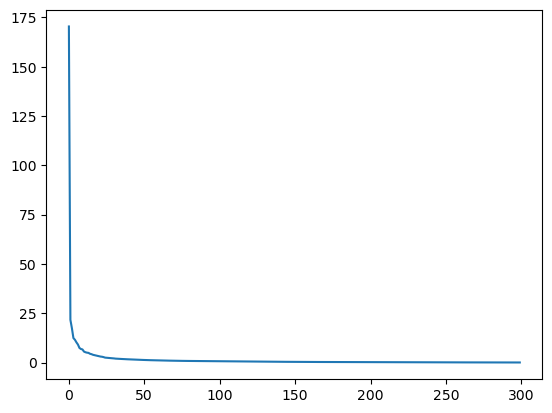

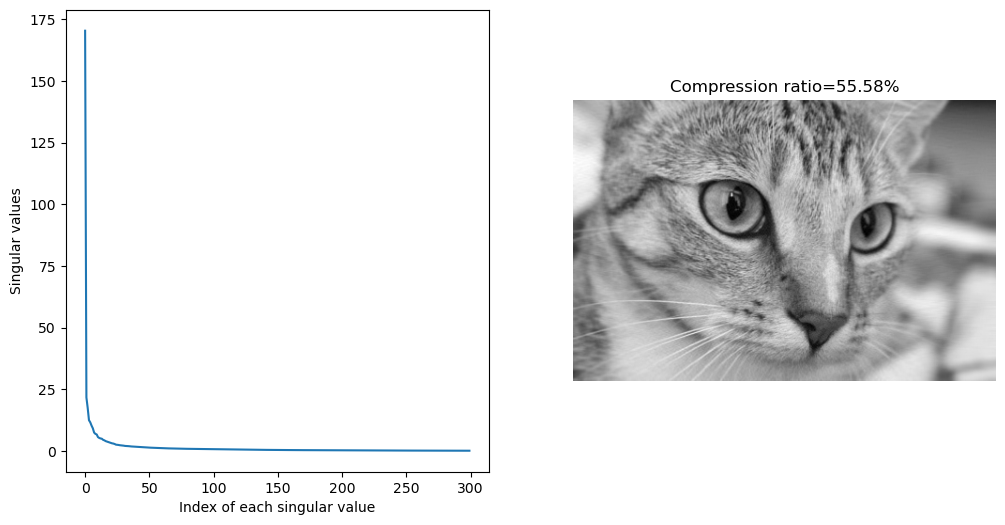

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_float

from numpy.linalg import svd

cat_image = rgb2gray(img_as_float(data.chelsea()))

original_shape = cat_image.shape
print("Original image shape:", original_shape)

def compress_svd(image, k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    U, s, V = svd(image, full_matrices=False)
    reconst_matrix = np.dot(U[:, :k], np.dot(np.diag(s[:k]), V[:k, :]))
    return reconst_matrix, s

k = 100
reconst_img, s = compress_svd(cat_image, k)

print('The first 10 singular values:', np.round(s[:10], 1))
plt.plot(s)

threshold_energy = 0.95  # Target energy retention percentage

def calculate_threshold_singular_values(image, target_energy=0.95):
    U, s, V = svd(image, full_matrices=False)
    energy_total = np.sum(s ** 2)
    energy_target = energy_total * target_energy
    cumulative_energy = np.cumsum(s ** 2)
    threshold_index = np.argmax(cumulative_energy >= energy_target)
    threshold_singular_value = s[threshold_index]
    return threshold_singular_value

threshold_singular_value = calculate_threshold_singular_values(cat_image, threshold_energy)
print("Threshold Singular Value for 95% Energy Retention:", threshold_singular_value)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(s)
axes[0].set_xlabel('Index of each singular value')
axes[0].set_ylabel('Singular values')

print('The size of original image:', original_shape[0] * original_shape[1])
print('The size after compression:', k * (original_shape[0] + original_shape[1] + 1))
compression_ratio = k * (original_shape[0] + original_shape[1] + 1) / (original_shape[0] * original_shape[1]) * 100
axes[1].set_title("Compression ratio={:.2f}%".format(compression_ratio))
axes[1].imshow(reconst_img, cmap='gray')
axes[1].axis('off')

plt.show()

